In [14]:
# Importing the dependencies.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy
from config import weather_api_key
import requests
import time
from datetime import datetime

In [2]:
# Creating array of sets of random latitude and longitude
lats = np.random.uniform(low=-90.000,high=90.000, size = 1500)
lngs = np.random.uniform(low=-180.000,high=180.000, size = 1500)
latLngs = zip(lats,lngs)
latLngs

In [3]:
# Adding the latitudes & longitudes to a list
coordinates = list(latLngs)

In [4]:
#Creating list of cities
cities = []

#Identifying the nearest city for each lat and long combo
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name

    #Checking to see if the city is unique. If so, it is added to the "cities" list.
    if city not in cities:
        cities.append(city)

#print the city count to confirm there are enough
len(cities)

605

In [5]:
url = 'https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=' + weather_api_key
#Creating an empty list to hold the weather data
cityData = []

#Printing the beginning of the logging
print("Beginning Data Retrieval      ")
print('------------------------------')

#Creating counters
recordCount = 1
setCount = 1

#looping through all the cities in our list
for i, city in enumerate(cities):
    #grouping cities into sets of 50 for logging purposes
    if i % 50 == 0 and i >= 50:
        setCount += 1
        recordCount = 1
        time.sleep(60)

    #creating endpoint URL with each city
    cityURL = url + '&q=' + city.replace(' ','+')

    #logging the URL, Record and set numbers and the city
    print(f'Processing Record {recordCount} of Set {setCount} | {city}')
    #adding 1 to record count
    recordCount += 1
# Run an API request for each of the cities.
    try:
        #parsing the json and retrieving the data
        cityWeather = requests.get(cityURL).json()

        #parsing out the needed data
        cityLat = cityWeather['coord']['lat']
        cityLng = cityWeather['coord']['lon']
        cityMaxTemp = cityWeather['main']['temp_max']
        cityHumidity = cityWeather['main']['humidity']
        cityClouds = cityWeather['clouds']['all']
        cityWind = cityWeather['wind']['speed']
        cityCountry = cityWeather['sys']['country']

        #Converting date to ISO standard
        cityDate = datetime.utcfromtimestamp(cityWeather['dt']).strftime('%Y-%m-%d %H:%M:%S')

        #Apprending the city information into cityData list
        cityData.append({'City': city.title(),
                         'Lat':cityLat,
                         'Lng':cityLng,
                         'Max Temp':cityMaxTemp,
                         'Humidity':cityHumidity,
                         'Cloudiness':cityClouds,
                         'Wind Speed':cityWind,
                         'Country':cityCountry,
                         'Date':cityDate})
# If an error is experienced, skip the city.
    except:
        print('City not found. Skipping City...')
        pass
    #Indicate that data loading is complete
print('--------------------------')
print('Data Retrieval Complete!')
print('--------------------------')

Beginning Data Retrieval      
------------------------------
Processing Record 1 of Set 1 | glamoc
Processing Record 2 of Set 1 | grindavik
Processing Record 3 of Set 1 | severo-kurilsk
Processing Record 4 of Set 1 | hilton head island
Processing Record 5 of Set 1 | ughelli
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | khatanga
Processing Record 8 of Set 1 | rungata
City not found. Skipping City...
Processing Record 9 of Set 1 | nanortalik
Processing Record 10 of Set 1 | salalah
Processing Record 11 of Set 1 | nizhneyansk
City not found. Skipping City...
Processing Record 12 of Set 1 | mar del plata
Processing Record 13 of Set 1 | petropavlovsk-kamchatskiy
Processing Record 14 of Set 1 | verkhoyansk
Processing Record 15 of Set 1 | babanusah
City not found. Skipping City...
Processing Record 16 of Set 1 | amderma
City not found. Skipping City...
Processing Record 17 of Set 1 | punta arenas
City not found. Skipping City...
Processing Record 18 of Set 1 | mitsam

In [6]:
len(cityData)

554

In [7]:
#Converting the array of dictionaries to a pandas DataFrame
cityDataDf = pd.DataFrame(cityData)

#Reordering the columns
newColumnOrder = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
cityDataDf = cityDataDf[newColumnOrder]

cityDataDf.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Glamoc,BA,2021-12-02 09:07:25,44.0458,16.8486,41.45,96,100,16.11
1,Grindavik,IS,2021-12-02 09:07:26,63.8424,-22.4338,39.67,75,75,13.80
2,Severo-Kurilsk,RU,2021-12-02 09:07:26,50.6789,156.1250,35.19,72,59,29.08
3,Hilton Head Island,US,2021-12-02 09:07:27,32.2163,-80.7526,52.99,83,20,0.00
4,Ughelli,NG,2021-12-02 09:07:27,5.4899,6.0074,87.39,63,100,3.85


In [15]:
# Creating the output file (CSV)
outputDataFile = 'weather_data/cities.csv'
#Exporting the cityData into a CSV
cityDataDf.to_csv(outputDataFile, index_label='City_ID')

In [16]:
#Extract relevant fields from the datafram for plotting
lats = cityDataDf['Lat']
maxTemps = cityDataDf['Max Temp']
humidity = cityDataDf['Humidity']
cloudiness = cityDataDf['Cloudiness']
windSpeed = cityDataDf['Wind Speed']

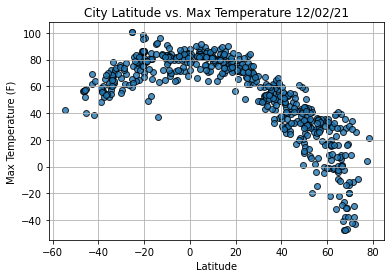

In [20]:
#Importing time module
import time
#Building the scatter plot for lat vs max temp
plt.scatter(lats,
            maxTemps,
            edgecolor='black', linewidth = 1, marker='o',
            alpha=0.8,label='Cities')

#Adding graph properties
plt.title(f'City Latitude vs. Max Temperature '+ time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

#Saving the figure
plt.savefig('weather_data/Fig1.png')

plt.show()

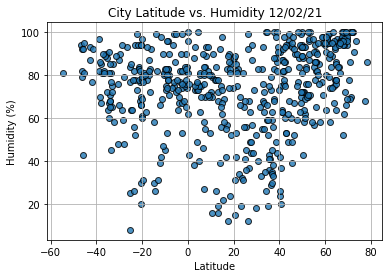

In [21]:
#Building the scatter plot for lat vs humidity
plt.scatter(lats,
            humidity,
            edgecolor='black', linewidth = 1, marker='o',
            alpha=0.8,label='Cities')

#Adding graph properties
plt.title(f'City Latitude vs. Humidity '+ time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

#Saving the figure
plt.savefig('weather_data/Fig2.png')

plt.show()

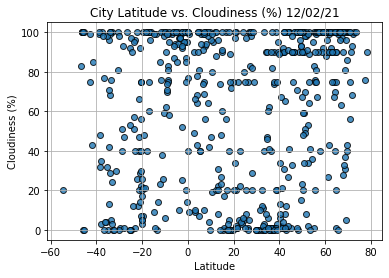

In [22]:
#Building the scatter plot for lat vs cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor='black', linewidth = 1, marker='o',
            alpha=0.8,label='Cities')

#Adding graph properties
plt.title(f'City Latitude vs. Cloudiness (%) '+ time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

#Saving the figure
plt.savefig('weather_data/Fig3.png')

plt.show()

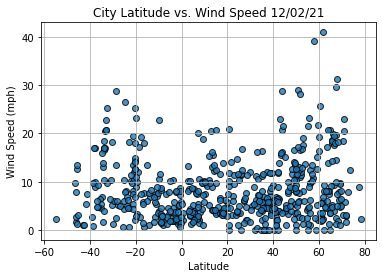

In [23]:
#Building the scatter plot for lat vs cloudiness
plt.scatter(lats,
            windSpeed,
            edgecolor='black', linewidth = 1, marker='o',
            alpha=0.8,label='Cities')

#Adding graph properties
plt.title(f'City Latitude vs. Wind Speed '+ time.strftime('%x'))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

#Saving the figure
plt.savefig('weather_data/Fig4.png')

plt.show()